# From Sect 17-Part 2 to Sect 18 - Part 1 - Code Examples


Extracted from:
online-ds-pt-100719 study group from 
01/09/2020

## Learning Objectives

- Quickly review sets/combinations/permutations (10-15 min max)

- Revisit probability and how its calculated. (5-10 min)
- Understand conditional probability and disjointed events.
- Understand the Law of Total Probability 


## Questions:
- Breaking down interpolation - Lab (will get to next class)

In [1]:
!pip install -U fsds_100719

from math import factorial
from fsds_100719.imports import *

fsds_1007219  v0.6.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


## PLAYLIST PERMUTATIONS (review)

- We are constructing a dinner party playlist for a gathering we are planning. 
- We asked our attendees to each provide a handful of songs they would like to be played at the dinner party.

### Playlist Permutations

In [2]:
john_recs = [['artist','track']]
john_recs.append(['Black Eyed Peas',"Let's Get it Started"])
john_recs.append(['Lady GaGa','Poker Face'])
john_recs.append(['Lady GaGa','Bad Romance'])
df_john_recs = pd.DataFrame(john_recs[1:],columns=john_recs[0])
df_john_recs['Recommended By'] = 'John'
df_john_recs.style.set_caption('JOHN')

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,John
1,Lady GaGa,Poker Face,John
2,Lady GaGa,Bad Romance,John


In [3]:
anne_recs = [['artist','track']]
anne_recs.append(['Smashing Pumpkins','Tonight, Tonight'])
anne_recs.append(['Black Eyed Peas',"Let's Get it Started"])
anne_recs.append(['Green Day','Time of your Life'])

df_anne_recs = pd.DataFrame(anne_recs[1:],columns=anne_recs[0])
df_anne_recs['Recommended By'] = 'Anne'
df_anne_recs.style.set_caption('ANNE')

,artist,track,Recommended By
0,Smashing Pumpkins,"Tonight, Tonight",Anne
1,Black Eyed Peas,Let's Get it Started,Anne
2,Green Day,Time of your Life,Anne


In [4]:
joe_recs= [['artist','track']]
joe_recs.append(['Green Day','Time of your Life'])
joe_recs.append(['B-52s','Rock Lobster'])
joe_recs.append(['Lady GaGa','Poker Face'])
joe_recs.append(['John Lennon','Imagine'])

df_joe_recs = pd.DataFrame(joe_recs[1:],columns=joe_recs[0])
df_joe_recs['Recommended By'] = 'Joe'
df_joe_recs.style.set_caption('JOE')

,artist,track,Recommended By
0,Green Day,Time of your Life,Joe
1,B-52s,Rock Lobster,Joe
2,Lady GaGa,Poker Face,Joe
3,John Lennon,Imagine,Joe


In [5]:
samantha_recs = [['artist','track']]
samantha_recs.append(['Black Eyed Peas',"Let's Get it Started"])
samantha_recs.append(['Panic at the Disco','Hallelujah'])
samantha_recs.append(['Adele','Set Fire to the Rain'])

df_samantha_recs = pd.DataFrame(samantha_recs[1:],columns=samantha_recs[0])
df_samantha_recs['Recommended By'] = 'Samantha'
df_samantha_recs.style.set_caption('SAMANTHA')

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,Samantha
1,Panic at the Disco,Hallelujah,Samantha
2,Adele,Set Fire to the Rain,Samantha


In [6]:
james_recs=[['artist','track']]
james_recs.append(['Eve 6',"Here's to the Night"])
james_recs.append(['Neutral Milk Hotel',"Into the Aeroplane Over the Sea"])
james_recs.append(['Rilo Kiley',"With Arms Outstretched"])
james_recs.append(['Red Hot Chili Peppers',"Otherside"])

df_james_recs = pd.DataFrame(james_recs[1:],columns=james_recs[0])
df_james_recs['Recommended By'] = 'James'
df_james_recs.style.set_caption('JAMES')

,artist,track,Recommended By
0,Eve 6,Here's to the Night,James
1,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James
2,Rilo Kiley,With Arms Outstretched,James
3,Red Hot Chili Peppers,Otherside,James


In [7]:
df = pd.concat([df_john_recs,df_anne_recs,
                df_joe_recs,df_samantha_recs,
               df_james_recs],axis=0)
df

,artist,track,Recommended By
0,Black Eyed Peas,Let's Get it Started,John
1,Lady GaGa,Poker Face,John
2,Lady GaGa,Bad Romance,John
0,Smashing Pumpkins,"Tonight, Tonight",Anne
1,Black Eyed Peas,Let's Get it Started,Anne
2,Green Day,Time of your Life,Anne
0,Green Day,Time of your Life,Joe
1,B-52s,Rock Lobster,Joe
2,Lady GaGa,Poker Face,Joe
3,John Lennon,Imagine,Joe


In [8]:
## Making Sample Spaces for Tracks and artists
sTracks = set(df['track'])
sArtists = set(df['artist'])

print(len(sTracks),len(sArtists))
sTracks#,sArtists

13 12


{'Bad Romance',
 'Hallelujah',
 "Here's to the Night",
 'Imagine',
 'Into the Aeroplane Over the Sea',
 "Let's Get it Started",
 'Otherside',
 'Poker Face',
 'Rock Lobster',
 'Set Fire to the Rain',
 'Time of your Life',
 'Tonight, Tonight',
 'With Arms Outstretched'}

### Q1: How many different ways could we build a playlist using everyone's recommendations (without shuffle, no looping, and no repeated songs)?

- Q: Combination or permutation?
    -  Permutation

- Q: What formula would we use?
 $$\large P(n) = n!$$

In [9]:
from math import factorial
"{:,}".format(factorial(len(sTracks)))

'6,227,020,800'

### Q2: What if we limit the playlist to only 10 songs, without replacement?

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$ \large P_{k}^{n}= \dfrac{n!}{(n-k)!}$$ 


In [10]:
p_10_13 = factorial(13) / factorial(13-10)
"{:,}".format(p_10_13)

'1,037,836,800.0'

### Q3: what if we limit the playlist to 10 songs, WITH replacement?

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$ \large {P}_{j}^{n} = n^j $$


In [11]:
p_10_13R = 13**10
"{:,}".format(p_10_13R)

'137,858,491,849'

### Q4: what if we select 10 songs out of the total number of suggestions and allow for repitition?

In [12]:
print(df['track'].value_counts().sum())
df['track'].value_counts()

17


Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Here's to the Night                1
Hallelujah                         1
With Arms Outstretched             1
Rock Lobster                       1
Set Fire to the Rain               1
Tonight, Tonight                   1
Bad Romance                        1
Into the Aeroplane Over the Sea    1
Otherside                          1
Imagine                            1
Name: track, dtype: int64

- Q: Combination or permutation?
    - Permutation

- Q: What formula would we use?
$$\dfrac{n!}{n_1!n_2!\ldots n_j!}$$


In [13]:
p17R = factorial(17) / (factorial(3)*factorial(2)*factorial(2))
"{:,}".format(p17R)

'14,820,309,504,000.0'

### We realize we need to relax and not worry about the song-order. That's what Shuffle is for, right?

### Q5: How many playlists can we produce for an 8-track playlist from the unique suggested songs (10)?

- Q: Combination or permutation?
    - Combination

- Q: What formula would we use?
$$\large C_{k}^{n} = \displaystyle\binom{n}{k} = \dfrac{P_{k}^{n}}{k!}=\dfrac{ \dfrac{n!}{(n-k)!}}{k!} = \dfrac{n!}{(n-k)!k!}$$

In [14]:
c_8_10 = factorial(10)/ (factorial((10-8))*factorial(8))
"{:,}".format(c_8_10)

'45.0'

## Probability (review)


### What is probability?

> **Probability is the likelihood of a specific outcome/event occuring out of all possible outcomes, expressed as a fraction between 0 and 1**

Example Probability Qs:
- How likely is it to end up with heads when flipping a coin once? (the answer here is 50% - not very surprising)

- How likely is it to end up with exactly 2 x heads and 3 x tails when flipping a coin 5 times?

- How likely is it to throw tails first, then heads, then tails, then heads, then tails when flipping a coin 5 times?

- If you throw 5 dice, what is the probability of throwing a ["full house"](http://grail.sourceforge.net/demo/yahtzee/rules.html)?

- What is the probability of drawing 2 consecutive aces from a standard deck of cards?

> But how do we calculate it? ..._to be continued_...



#### Sample Space & Event Space

##### Sample space:
$$S = \{ 1,2,3,4,5,6\}$$ 
being the possible outcomes when throwing a dice.
- Sample space =  $\Omega$ 

##### Event space:
-   The **event space** is a subset of the sample space. It is the **desired outcome** of the experiment.
$$E \subseteq S$$
-   Example:
    -   Throwing an odd number would lead to an event space $$E = \{ 1,3,5\}$$.

#### Probability of an Event

$$ P(E) = \frac{|E|}{|S|} $$
probability is the number of possible preferred outcomes over the sample space / all outcomes

### Law of relative frequency

- Limit of large infinite outcomes produce fixed numbers .
$$ \large P(E) = \lim_{n\to\infty}\frac{S(n)}{n}$$
    - Probability of Event E having Successful(S) outcomes for $n$ trials
    

#### Probability axioms

1.  Positivity : 

    - Prob is always $0 <= P(E) <=1$


2.  Probability of a certain event:

    - $P(S)=1$


3.  Additivity Union of 2 exclusive sets = sum prob of individual events happening
    
    - If $A\cap B = \emptyset $, then $P(A\cup B) = P(A) + P(B)$

#### Addition law of probability 

-   Prob of union of A and B is individual P minus intersection

$$ \large P(A\cup B) = P(A) + P(B) - P(A \cap B)$$

### EXAMPLE PROBABILITY PROBLEMS WITH PLAYLISTS

**If we just accept everyone's suggestions (full df) and play on shuffle:**

- Q: What is the probability of hearing "Let's Get it started"?

In [15]:
df['track'].value_counts()#sum()#sort_values('track')

Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Here's to the Night                1
Hallelujah                         1
With Arms Outstretched             1
Rock Lobster                       1
Set Fire to the Rain               1
Tonight, Tonight                   1
Bad Romance                        1
Into the Aeroplane Over the Sea    1
Otherside                          1
Imagine                            1
Name: track, dtype: int64

$$P(E) = |E| / |S|  $$

In [16]:
3/17

0.17647058823529413

In [17]:
display(df['artist'].value_counts())
df['artist'].value_counts().sum()


Lady GaGa                3
Black Eyed Peas          3
Green Day                2
Eve 6                    1
John Lennon              1
Smashing Pumpkins        1
Panic at the Disco       1
Neutral Milk Hotel       1
Adele                    1
Red Hot Chili Peppers    1
Rilo Kiley               1
B-52s                    1
Name: artist, dtype: int64

17

- Q: What is the probability of playing a song by Lady GaGa?

In [18]:
3/17

0.17647058823529413

## Conditional Probability with Playlists

### Q: what is the probability of hearing a "Poker Face" given that the song is by Lady GaGa?

In [19]:
df['track'].value_counts()

Let's Get it Started               3
Time of your Life                  2
Poker Face                         2
Here's to the Night                1
Hallelujah                         1
With Arms Outstretched             1
Rock Lobster                       1
Set Fire to the Rain               1
Tonight, Tonight                   1
Bad Romance                        1
Into the Aeroplane Over the Sea    1
Otherside                          1
Imagine                            1
Name: track, dtype: int64

In [20]:
display(df.groupby('artist')['track'].count())

artist
Adele                    1
B-52s                    1
Black Eyed Peas          3
Eve 6                    1
Green Day                2
John Lennon              1
Lady GaGa                3
Neutral Milk Hotel       1
Panic at the Disco       1
Red Hot Chili Peppers    1
Rilo Kiley               1
Smashing Pumpkins        1
Name: track, dtype: int64

- What is the probability of playing Poker Face given that its a Lady GaGa song?

$$ P(PokerFace|LadyGaga)$$

In [21]:
df.groupby('artist').get_group('Lady GaGa')['track'].value_counts()

Poker Face     2
Bad Romance    1
Name: track, dtype: int64

In [22]:
# |s|=3 
# |e| = 2
2/3

0.6666666666666666

# LAW OF TOTAL PROBABILITY

- This law allows us to calculate $P(B)$ from partial/conditional probabilitie of subsets ($A_n$).
- Requires that the different $A$'s that make up sample space $S$ be disjointed events.

S $A_1, A_2, \dots, A_n$ partition sample space $S$ into disjoint regions that sum up to $S$. In the example, the four regions

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-law-of-total-probability-online-ds-ft-100719/master/images/Image_55_TotProb.png">

The probability of a random event $B$ (orange area) can be written down as:

\begin{align}
    P(B) &= P(B \cap A_1) + P(B \cap A_2) + P(B \cap A_3)+ P(B \cap A_4) \\
         &= P(B \mid A_1)P(A_1) + P(B \mid A_2)P(A_2) +P(B \mid A_3)P(A_3)+ P(B \mid A_4)P(A_4)
\end{align}

- using the first theorem above let us find the combined probabilities.


#### Law of Total Probability

If $B_1$,$B_2$,$B_3$,$\dots$ is a partition of the sample space S, then for any event A we have

$$P(A)= \sum_i P(A \cap B_i)= \sum_i P(A \mid B_i)P(B_i)$$

Using a Venn diagram, we can pictorially see the idea behind the law of total probability. In the figure below, we have

* $A_1 = A \cap B_1$
* $A_2 = A \cap B_2$
* $A_3 = A \cap B_3$


# From Dinner Party Playlist to House Party Playlists

- House party spread across 4 rooms (living room, basement, back patio, kitchen).
- Separate playlists playing at each location
- Calculate conditinal probability / total probability examples

In [23]:
house_party = dict(living_room = df.sample(12).reset_index(drop=True).copy(),
                   basement = df.sample(10).reset_index(drop=True).copy(), 
                   back_patio = df.sample(9).reset_index(drop=True).copy(),
                  kitchen=df.sample(8).reset_index(drop=True).copy())

for k,v in house_party.items():
    v['Room'] = k 
    display(v)

,artist,track,Recommended By,Room
0,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,living_room
1,Eve 6,Here's to the Night,James,living_room
2,Smashing Pumpkins,"Tonight, Tonight",Anne,living_room
3,Black Eyed Peas,Let's Get it Started,Samantha,living_room
4,Black Eyed Peas,Let's Get it Started,John,living_room
5,B-52s,Rock Lobster,Joe,living_room
6,Red Hot Chili Peppers,Otherside,James,living_room
7,Green Day,Time of your Life,Joe,living_room
8,Rilo Kiley,With Arms Outstretched,James,living_room
9,Adele,Set Fire to the Rain,Samantha,living_room


,artist,track,Recommended By,Room
0,Black Eyed Peas,Let's Get it Started,Samantha,basement
1,Green Day,Time of your Life,Anne,basement
2,Lady GaGa,Poker Face,John,basement
3,Panic at the Disco,Hallelujah,Samantha,basement
4,Adele,Set Fire to the Rain,Samantha,basement
5,Lady GaGa,Poker Face,Joe,basement
6,Black Eyed Peas,Let's Get it Started,Anne,basement
7,B-52s,Rock Lobster,Joe,basement
8,Smashing Pumpkins,"Tonight, Tonight",Anne,basement
9,Eve 6,Here's to the Night,James,basement


,artist,track,Recommended By,Room
0,Black Eyed Peas,Let's Get it Started,Samantha,back_patio
1,Red Hot Chili Peppers,Otherside,James,back_patio
2,Lady GaGa,Bad Romance,John,back_patio
3,Lady GaGa,Poker Face,Joe,back_patio
4,B-52s,Rock Lobster,Joe,back_patio
5,Green Day,Time of your Life,Anne,back_patio
6,Black Eyed Peas,Let's Get it Started,Anne,back_patio
7,Eve 6,Here's to the Night,James,back_patio
8,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,back_patio


,artist,track,Recommended By,Room
0,Eve 6,Here's to the Night,James,kitchen
1,Panic at the Disco,Hallelujah,Samantha,kitchen
2,Green Day,Time of your Life,Anne,kitchen
3,Neutral Milk Hotel,Into the Aeroplane Over the Sea,James,kitchen
4,Lady GaGa,Poker Face,John,kitchen
5,Black Eyed Peas,Let's Get it Started,John,kitchen
6,Smashing Pumpkins,"Tonight, Tonight",Anne,kitchen
7,Green Day,Time of your Life,Joe,kitchen


### OUR HOUSE PARTY & LAW OF TOTAL PROB
- Our House Party is sample space S
- The 4 rooms are A1,A2,A3,A4
- B represents the probabilty of hearing a specific song or artist as you wander the house.
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-law-of-total-probability-online-ds-ft-100719/master/images/Image_55_TotProb.png">

In [24]:
# df_house_party = pd.concat(house_party.values(),axis=0)
# df_house_party.reset_index(inplace=True,drop=True)
# # df_house_party

In [25]:
res = house_party['living_room']['track'].value_counts()
res.sum()

12

In [26]:
rooms_list= list(house_party.keys())

def get_room_counts(room='livng_room', 
                    column='artist', return_res=False,verbose=True):
    """Get value counts from house_party dict for the room and specified column."""
    room_counts = house_party[room][column].value_counts()
    
    if verbose: 
        display(room_counts)
        print('Total Tracks: ',room_counts.sum())
    
    if return_res:
        return room_counts
    
def get_room_prob(room='living_room', column='artist',target='Green Day', verbose=True):
    room_counts = get_room_counts(room, column, True,False)
    if verbose:
        print(f"[i] Prob of {target} given {room} = {room_counts.loc[target]}/{room_counts.sum()}")
        
    return room_counts.loc[target]/room_counts.sum()
    

### Q1: What is the probability of hearing a Green Day song at the house party at any given moment?

$$P(A)= \sum_i P(A \cap B_i)= \sum_i P(A \mid B_i)P(B_i)$$


$$ P(GD)=\sum_i P(GD \mid Room_i)P(Room_i)$$

####  To Calculate $P(GD)$ =

$P(GD|Room1)\times \frac{1}{4} + P(GD|Room2)\times \frac{1}{4} + P(GD|Room3)\times \frac{1}{4} + P(GD|Room4)\times \frac{1}{4} $





In [27]:
rooms_list

['living_room', 'basement', 'back_patio', 'kitchen']

In [28]:
# p_gd_given_rm1 
# val_counts = get_room_counts(room=rooms_list[0],column='artist',return_res=True)
p_gd = 0
for room in rooms_list:
    prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
    p_gd += (prob_rm)*(1/4)
p_gd

[i] Prob of Green Day given living_room = 1/12
[i] Prob of Green Day given basement = 1/10
[i] Prob of Green Day given back_patio = 1/9
[i] Prob of Green Day given kitchen = 2/8


0.13611111111111113

In [29]:
p_gd = 0
for room in rooms_list:
    prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
    p_gd += (prob_rm)*(1/4)
p_gd

[i] Prob of Green Day given living_room = 1/12
[i] Prob of Green Day given basement = 1/10
[i] Prob of Green Day given back_patio = 1/9
[i] Prob of Green Day given kitchen = 2/8


0.13611111111111113

### What if we have unequal probabilties for being in each room?

In [30]:
rooms_probs = dict(zip(rooms_list,[0.15,0.15,0.3,0.4]))
rooms_probs

{'living_room': 0.15, 'basement': 0.15, 'back_patio': 0.3, 'kitchen': 0.4}

In [31]:
np.sum(list(rooms_probs.values()))

1.0

In [32]:
p_gd = 0
for room,room_prob in rooms_probs.items():
    prob_rm = get_room_prob(room=room,target='Green Day',column='artist')
    p_gd += (prob_rm)*(room_prob)
p_gd

[i] Prob of Green Day given living_room = 1/12
[i] Prob of Green Day given basement = 1/10
[i] Prob of Green Day given back_patio = 1/9
[i] Prob of Green Day given kitchen = 2/8


0.16083333333333333

### Q: what is the probability of hearing a song recommend by Anne?

$$ P(AnneRec)=\sum_i P(AnneRec \mid Room_i)P(Room_i)$$


In [33]:
p_anne = 0

for room,room_prob in rooms_probs.items():
    prob_rm = get_room_prob(room=room, target='Anne',column='Recommended By')
    p_anne += (prob_rm * room_prob)
    
p_anne

[i] Prob of Anne given living_room = 1/12
[i] Prob of Anne given basement = 3/10
[i] Prob of Anne given back_patio = 2/9
[i] Prob of Anne given kitchen = 2/8


0.22416666666666668

In [34]:
people = df["Recommended By"].unique()
people

array(['John', 'Anne', 'Joe', 'Samantha', 'James'], dtype=object)

In [35]:
def loop_people(people):
    p_total = []
    for person in people:
        p_john = 0

        for room,room_prob in rooms_probs.items():
            try:
                prob_rm = get_room_prob(room=room, target=person,column='Recommended By')
                
            except:
                prob_rm=0
            p_john += (prob_rm * room_prob)
           
            
        p_total.append(p_john)

    assert np.sum(p_total)==1.0
    print(f"Prob for songs by {person}= {p_john}",end='\n\n')


In [36]:
tot = loop_people(people)


[i] Prob of John given living_room = 1/12
[i] Prob of John given basement = 1/10
[i] Prob of John given back_patio = 1/9
[i] Prob of John given kitchen = 2/8
[i] Prob of Anne given living_room = 1/12
[i] Prob of Anne given basement = 3/10
[i] Prob of Anne given back_patio = 2/9
[i] Prob of Anne given kitchen = 2/8
[i] Prob of Joe given living_room = 4/12
[i] Prob of Joe given basement = 2/10
[i] Prob of Joe given back_patio = 2/9
[i] Prob of Joe given kitchen = 1/8
[i] Prob of Samantha given living_room = 2/12
[i] Prob of Samantha given basement = 3/10
[i] Prob of Samantha given back_patio = 1/9
[i] Prob of Samantha given kitchen = 1/8
[i] Prob of James given living_room = 4/12
[i] Prob of James given basement = 1/10
[i] Prob of James given back_patio = 3/9
[i] Prob of James given kitchen = 2/8
Prob for songs by James= 0.265



# Intro to Section 18 - Statistical Distributions

- Distributions are directly related to probability, which is a critical concept we will explore more with Hypothesis Testing in Module 3.

## Probability Mass Function (AKA Probability Distribution Function)

### Flipping a coin

In [37]:
fs.ds.inspect_variables(locals())

,type,size
variable,,
df,DataFrame,3618
v,DataFrame,2309
df_james_recs,DataFrame,991
df_joe_recs,DataFrame,928
res,Series,922
df_samantha_recs,DataFrame,777
df_anne_recs,DataFrame,771
df_john_recs,DataFrame,751
sTracks,set,736


#[i] set `print_names=True` for var names to copy/paste.
---------------------------------------------


In [38]:
from collections import Counter

def coin_toss(n_flips=10,outcomes=None,verbose=True,
              plot_outcomes=True):
    if outcomes is None:
        outcomes = []
    
    for toss in range(n_flips):
        result = 'H' if np.random.random() >0.5 else 'T'
        outcomes.append(result)
        q
        if verbose: print(f"Toss {toss}: \t{result}")
            
    if plot_outcomes:
        fig,ax = plot_outcomes(outcomes)
    return outcomes
#     else:        
#         counter = Counter(outcomes)
#         return counter

In [39]:
def plot_outcomes(outcomes):
    if isinstance(outcomes,list):
        from collections import Counter
        counter = Counter(outcomes)

    fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    
    pmf = [] 
    for k,v in counter.items():
        pmf.append(round(v/len(outcomes),2))


    ax[0].bar(counter.keys(),pmf)
    ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
    ax[1].hist(list(counter.elements()))#counter.keys(),counter.values())
    ax[1].set(title=f'Histogram (sum={np.sum(list(outcomes.values()))})',ylabel='Counts',xlabel='Outcomes')
    
    plt.tight_layout()
    plt.show()
    return fig,ax

In [63]:
len(list(counter.elements()))
counter

Counter({'T': 2, 'H': 3})

In [64]:
def plot_pmf_vs_hist(counter):
    if isinstance(counter,list):
        from collections import Counter
        counter = Counter(counter)

    fig,ax=plt.subplots(ncols=2,figsize=(12,4))
    
    outcomes =list(counter.elements())

    pmf = [] 
    for k,v in counter.items():
        pmf.append(round(v/len(outcomes),2))


    ax[0].bar(counter.keys(),pmf)
    ax[0].set(title=f'PMF (sum={np.sum(pmf)})',ylabel='Frequency',xlabel='Outcomes')
    
    
    ax[1].hist(list(counter.elements()))#counter.keys(),counter.values())
    ax[1].set(title=f'Histogram (sum={np.sum(list(counter.values()))})',ylabel='Counts',xlabel='Outcomes')
    
    plt.tight_layout()
    plt.show()
    return fig,ax

In [65]:
# outcomes=[]
# outcomes = coin_toss(n_flips=5,outcomes=outcomes)
# outcomes = coin_toss(n_flips=10, outcomes=outcomes)
# plot_outcomes(outcomes)

In [66]:
outcomes=[]
outcomes = coin_toss(n_flips=5,outcomes=outcomes,plot_outcomes=False)

Toss 0: 	H
Toss 1: 	H
Toss 2: 	T
Toss 3: 	T
Toss 4: 	H


In [67]:
counter= Counter(outcomes)
counter

Counter({'H': 3, 'T': 2})

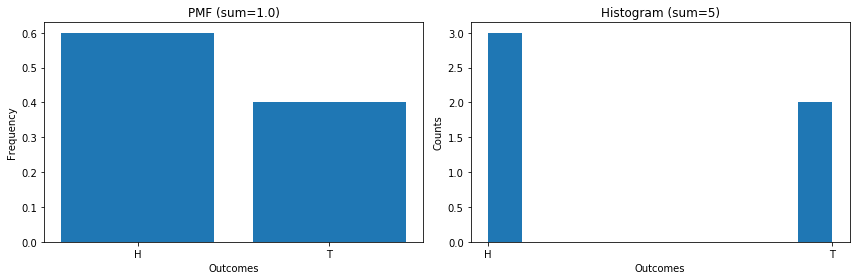

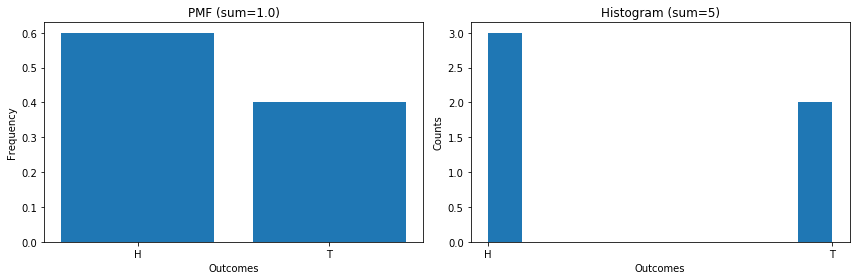

((<Figure size 864x288 with 2 Axes>,
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21f65128>,
        dtype=object)),
 (<Figure size 864x288 with 2 Axes>,
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22158a90>,
        dtype=object)))

In [68]:
plot_pmf_vs_hist(counter), plot_pmf_vs_hist(outcomes)

In [69]:
type(outcomes)

list

In [70]:
# ## COMB INED FOR GRIDSEARCH FOR RANDOM SEED
# # roll=1

# # print(f'[i] Roll {roll}')
# # outcomes = coin_toss(n_flips=12,outcomes=outcomes)
# # plot_pmf_vs_hist(outcomes)

# # def flip_again(n_flips=[10],outcomes=None):#,fig,ax):
# #     if isinstance(n_flips,int):
# #         n_flips=[n_flips]
# #     for n_flip in n_flips:
# #         outcomes = coin_toss(n_flips=n_flip,outcomes=outcomes)
# #         plot_pmf_vs_hist(outcomes)
# #     return outcomes

# for seed in [0,1,123,42,131]:
#     print(f'[i] Using seed {seed}')
#     np.random.seed(seed)
#     outcomes=None
#     outcomes = flip_again([10])
# #     outcomes = coin_toss(n_flips=20,outcomes=outcomes)
# #     plot_pmf_vs_hist(outcomes)

In [71]:
outcomes = coin_toss(n_flips=12,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

Toss 0: 	H
Toss 1: 	T
Toss 2: 	T
Toss 3: 	H
Toss 4: 	H
Toss 5: 	H
Toss 6: 	T
Toss 7: 	T
Toss 8: 	H
Toss 9: 	T
Toss 10: 	H
Toss 11: 	H


TypeError: 'bool' object is not callable

In [59]:
# outcomes = coin_toss(n_flips=21,outcomes=outcomes)
# plot_pmf_vs_hist(outcomes)

In [ ]:
# outcomes = coin_toss(n_flips=20,outcomes=outcomes)
# plot_pmf_vs_hist(outcomes)

In [ ]:
outcomes = coin_toss(n_flips=200,outcomes=outcomes)
plot_pmf_vs_hist(outcomes)

In [ ]:
outcomes[:20]

# For Next Time:
- Get vocab straight for dists
- Interpolation